In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import seaborn as sns

In [3]:
mnist = tf.keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

In [4]:
X_train_full

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [5]:
y_train_full

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
print(X_train_full.shape)
print(y_train_full.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


### Creating Validation set

In [7]:
x_valid = X_train_full[:5000]/255
x_train = X_train_full[5000:]/255

y_valid = y_train_full[:5000]
y_train = y_train_full[5000:]

X_test = X_test / 255.

In [8]:
x_valid 

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

### Visualisation 

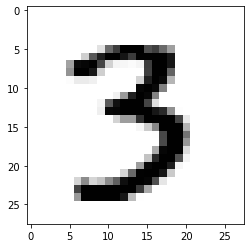

In [9]:
plt.imshow(x_train[5000], cmap="binary")
#plt.axis('off')
plt.show()


<AxesSubplot:>

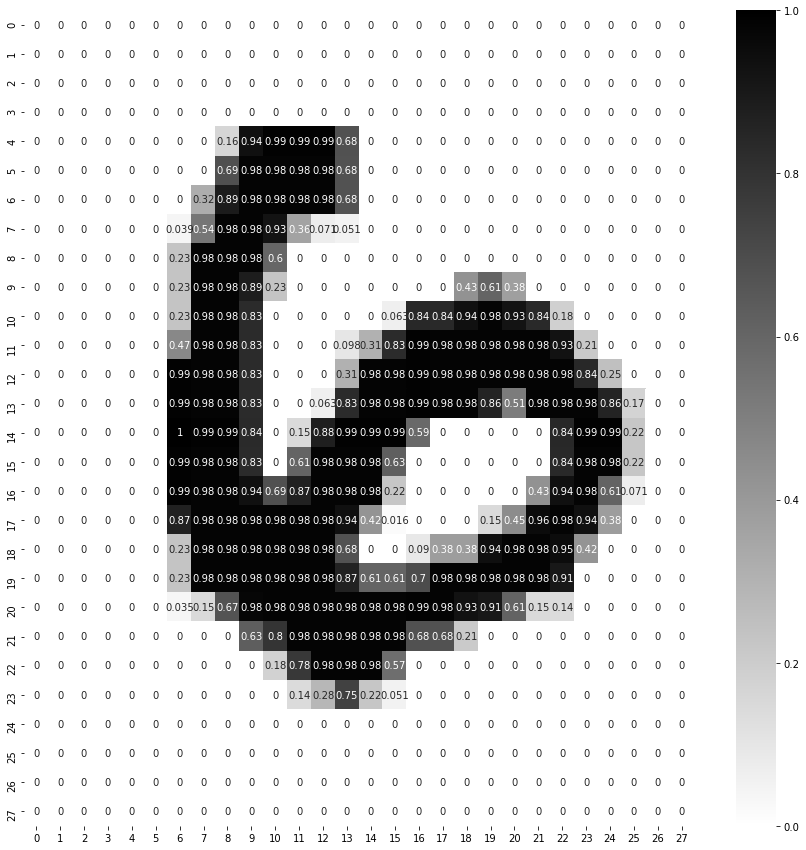

In [10]:
plt.figure(figsize=(15,15))
sns.heatmap(x_train[4000],annot=True,cmap="binary")

<AxesSubplot:>

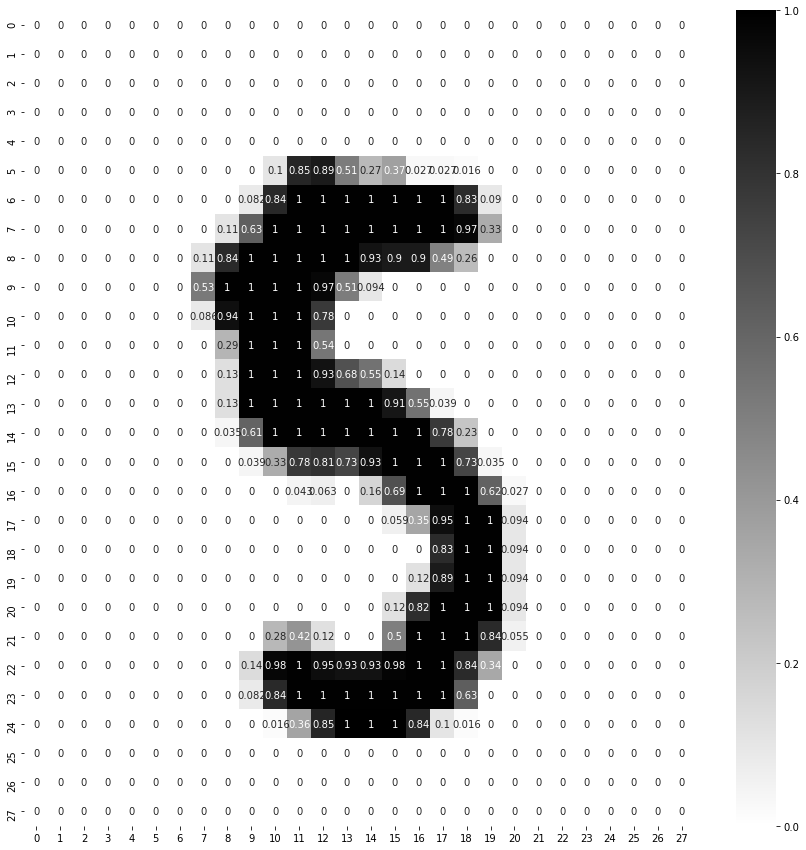

In [11]:
plt.figure(figsize=(15,15))
sns.heatmap(x_train[60],annot=True,cmap="binary")

In [12]:
print(x_train.shape)
print(y_train.shape)

(55000, 28, 28)
(55000,)


In [13]:
LAYERS = [tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")]

model_clf = tf.keras.models.Sequential(LAYERS)

In [14]:
model_clf.layers

In [18]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputLayer (Flatten)         (None, 784)               0         
_________________________________________________________________
hiddenLayer1 (Dense)         (None, 300)               235500    
_________________________________________________________________
hiddenLayer2 (Dense)         (None, 100)               30100     
_________________________________________________________________
outputLayer (Dense)          (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [19]:
hidden1 = model_clf.layers[1]
hidden1.name

'hiddenLayer1'

In [20]:
model_clf.get_layer(hidden1.name) is hidden1

True

In [21]:
type(hidden1.get_weights())

list

In [22]:
hidden1.get_weights()

[array([[-0.05307283, -0.05462278, -0.0410471 , ...,  0.01658396,
          0.03314137, -0.01676495],
        [ 0.05805293,  0.04285428,  0.06085561, ...,  0.03061225,
          0.03221498,  0.04191006],
        [-0.02170899,  0.07433116, -0.03648205, ..., -0.00604522,
         -0.01083366, -0.03501546],
        ...,
        [ 0.03097762,  0.00276577, -0.01540603, ...,  0.07343034,
          0.02533499, -0.05664039],
        [-0.05151876, -0.01370677, -0.04600836, ...,  0.02290113,
         -0.03991854,  0.05180134],
        [ 0.02018847, -0.04671933, -0.05104259, ...,  0.03360197,
          0.00122434, -0.0621078 ]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [23]:
weights, biases = hidden1.get_weights()

In [24]:
print("shape\n",weights.shape, "\n")
weights

shape
 (784, 300) 



array([[-0.05307283, -0.05462278, -0.0410471 , ...,  0.01658396,
         0.03314137, -0.01676495],
       [ 0.05805293,  0.04285428,  0.06085561, ...,  0.03061225,
         0.03221498,  0.04191006],
       [-0.02170899,  0.07433116, -0.03648205, ..., -0.00604522,
        -0.01083366, -0.03501546],
       ...,
       [ 0.03097762,  0.00276577, -0.01540603, ...,  0.07343034,
         0.02533499, -0.05664039],
       [-0.05151876, -0.01370677, -0.04600836, ...,  0.02290113,
        -0.03991854,  0.05180134],
       [ 0.02018847, -0.04671933, -0.05104259, ...,  0.03360197,
         0.00122434, -0.0621078 ]], dtype=float32)

In [25]:
print("shape\n", biases.shape)
biases

shape
 (300,)


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [26]:
LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "SGD" # or use with custom learning rate=> tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)

In [27]:
EPOCHS = 30
VALIDATION_SET = (x_valid, y_valid)

history = model_clf.fit(x_train, y_train, epochs=EPOCHS,
                    validation_data=VALIDATION_SET)

Epoch 1/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.6169 - accuracy: 0.8410 - val_loss: 0.3047 - val_accuracy: 0.9168
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2910 - accuracy: 0.9173 - val_loss: 0.2406 - val_accuracy: 0.9358
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2384 - accuracy: 0.9320 - val_loss: 0.2038 - val_accuracy: 0.9414
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2034 - accuracy: 0.9416 - val_loss: 0.1811 - val_accuracy: 0.9488
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1779 - accuracy: 0.9500 - val_loss: 0.1581 - val_accuracy: 0.9580
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1578 - accuracy: 0.9561 - val_loss: 0.1433 - val_accuracy: 0.9612
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1415 - accuracy: 0.9603 - val_loss: 0.1368 - val_accuracy:

NameError: name 'EPOCHS' is not defined